In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/Users/anjanikumar/Desktop/learnbay/learnbay projects/Github/data preprocessing'

In [3]:
titanic=pd.read_csv("titanic.csv")

In [4]:
titanic.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [6]:
# Data Preprocessing

#Part 1) Handling missing value

# Rule 1 - Threshold value : 25% or more than 25% missing data
# Approach - remove that particular column / row

# Rule 2 - Less than 25% missing data
# approach - 
    # a) check variable type (number or char)
        # i) variable type - charactor/object
        # approach - 'MODE' / Most Frequent occurance
        
        # ii) variable type - number (float / int)
        # approach - first we have to check outlier 
            # a) Outlier found - "Median"
            # b) Outlier not found - "Mean"
            

# Part 2 - Handling outlier treatment - this is only applicable for numeric variable
# Rule 1 - threshold value - 25% or more than 25% outlier found
# approach - check with your stakeholder/client whether we can remove that outlier or not
# answer - remove or keep

# keep - approach - Transformation approach
# Transaformation approach (either more than 25% or less then 25%)
# a) square root transformation
# b) cube root transformation
# c) log transformation
# d) i) positive outlier = Q3 + 1.5 * IQR ii) Negetive outlier = Q1 - 1.5 *IQR
# e) to do feature scaling (standarisation)

# Advanced tech - Regularisation approach - Lasso / Ridge / ElasticNet method



# Part 3 - Encoding concept - this is only applicable for char/object variable
# To covert char to number
# step 1 - Label Encoder - covert char to number in a sequence order
# step 2 - One Hot Encoder - convert all number into individual variable and then assign binary value 
# step 3 - Dummy variable - remove one variable (n-1) 
    # why are we doing it ? - To avoid multicollinearity

    
# Part 4 - Feature Scaling
    # approach - i) Standarisation and ii) Normalisation
    
    # i) Standarisation - when there is an outlier. it's range is -3 to +3. it gives both pos and neg value
    # ii) Normalisation - when there is no outlier. it's range is 0 to 1. it gives only pos value
# Part 5 - Imbalance dataset -



In [7]:
titanic.head(10)

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D
5,1,Male,48.0,0,0,26.55,Southampton,S
6,1,Female,63.0,1,0,77.96,Southampton,S
7,1,Male,39.0,0,0,0.00,Southampton,D
8,1,Female,53.0,2,0,51.48,Southampton,S
9,1,Male,71.0,0,0,49.50,Cherbourg,D


In [8]:
#Part 1 checking for missing data
titanic.isnull().sum()

Pclass        0
Gender        0
Age         263
SibSp         0
ParCh         0
Fare          1
Embarked      2
Status        0
dtype: int64

In [9]:
#check for percentage of missing data 
titanic.isnull().sum()/len(titanic)*100


Pclass       0.000000
Gender       0.000000
Age         20.091673
SibSp        0.000000
ParCh        0.000000
Fare         0.076394
Embarked     0.152788
Status       0.000000
dtype: float64

In [10]:
#the percentage of missing data is not 25% and more so we cannot drop any column

#Part1. Missing data is categorical in nature i.e Embarked 
    # Replace that with Mode.
titanic["Embarked"]= titanic["Embarked"].fillna(titanic["Embarked"].mode())

<AxesSubplot:ylabel='Age'>

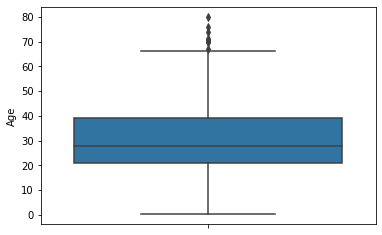

In [11]:
#Part2. Missing data is numerical in nature i.e. Age, Fare
      # Check for outliers
sns.boxplot(y="Age",data=titanic)


<AxesSubplot:ylabel='Fare'>

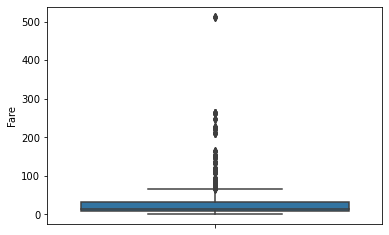

In [12]:
sns.boxplot(y="Fare",data=titanic)

In [13]:
#Outliers are present in both the numerical feild so we have to replace the missing value with MEDIAN

In [14]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())
titanic["Fare"]=titanic["Fare"].fillna(titanic["Fare"].median())

In [15]:
titanic.isnull().sum()/len(titanic)*100

Pclass      0.000000
Gender      0.000000
Age         0.000000
SibSp       0.000000
ParCh       0.000000
Fare        0.000000
Embarked    0.152788
Status      0.000000
dtype: float64

In [16]:
#Part2. Checking for outliers 
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


Pclass       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Age       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
SibSp     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
ParCh           AxesSubplot(0.125,0.125;0.227941x0.343182)
Fare         AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

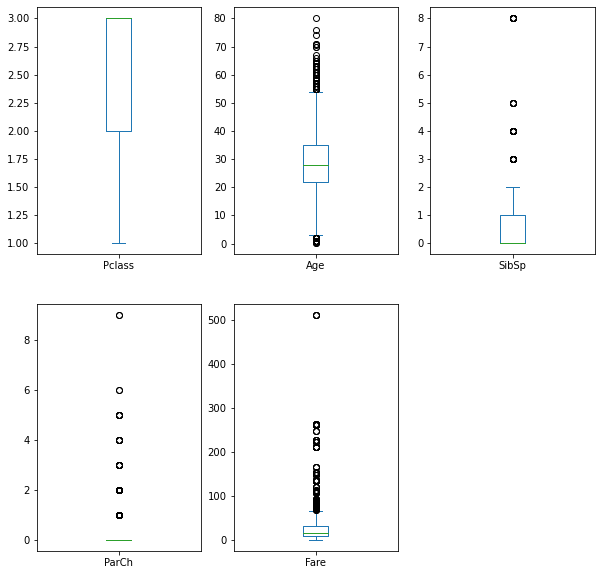

In [17]:
titanic.plot(kind="box", subplots=True, layout=(2,3), figsize=(10,10))

In [18]:
x = titanic.iloc[:,[2,5]]
x.head()

,Age,Fare
0,29.0,211.34
1,0.9,151.55
2,2.0,151.55
3,30.0,151.55
4,25.0,151.55


In [19]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR
print("pos_outlier",pos_outlier)
print("neg_outlier",neg_outlier)

pos_outlier Age     54.50
Fare    66.35
dtype: float64
neg_outlier Age      2.50
Fare   -27.17
dtype: float64


In [20]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [21]:
outliers = find_outliers_IQR(titanic["Age"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 101
percentage of outliers:  7.715813598166539
max outlier value: 80.0
min outlier value: 0.2


1        0.9
2        2.0
6       63.0
9       71.0
14      80.0
        ... 
1225    60.5
1230     2.0
1235    74.0
1240     0.4
1261    63.0
Name: Age, Length: 101, dtype: float64

In [22]:
outliers = find_outliers_IQR(titanic["Fare"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 171
percentage of outliers:  13.06340718105424
max outlier value: 512.33
min outlier value: 66.6


0       211.34
1       151.55
2       151.55
3       151.55
4       151.55
         ...  
1176     69.55
1177     69.55
1178     69.55
1179     69.55
1180     69.55
Name: Fare, Length: 171, dtype: float64

In [23]:
#No Column i,e Age and Fare has outliers more than 25% so we cant drop any column 
#Outlier treatment

In [24]:
#creating copy of original set
titanic1=titanic.copy()

In [25]:
#1.Removing outliers
titanic[~((titanic1<(Q1 - 1.5 *IQR)) | (titanic1 > (Q3 + 1.5 *IQR))).any(axis=1)]

/var/folders/5b/12xkc9vj1yg98rwcq_v34v_00000gn/T/ipykernel_18862/3821933385.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  titanic[~((titanic1<(Q1 - 1.5 *IQR)) | (titanic1 > (Q3 + 1.5 *IQR))).any(axis=1)]


,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
5,1,Male,48.0,0,0,26.55,Southampton,S
7,1,Male,39.0,0,0,0.00,Southampton,D
8,1,Female,53.0,2,0,51.48,Southampton,S
15,1,Male,28.0,0,0,25.93,Southampton,D
20,1,Male,37.0,1,1,52.55,Southampton,S
...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,14.45,Cherbourg,D
1305,3,Female,28.0,1,0,14.45,Cherbourg,D
1306,3,Male,26.5,0,0,7.23,Cherbourg,D
1307,3,Male,27.0,0,0,7.23,Cherbourg,D


In [26]:
#2.square root transformation 
titanic1["Age"]=np.sqrt(titanic1["Age"])
titanic1["Fare"]=np.sqrt(titanic1["Fare"])

In [27]:
outliers = find_outliers_IQR(titanic1["Age"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 105
percentage of outliers:  8.02139037433155
max outlier value: 8.94427190999916
min outlier value: 0.4472135954999579


1       0.948683
2       1.414214
6       7.937254
9       8.426150
14      8.944272
          ...   
1230    1.414214
1235    8.602325
1240    0.632456
1256    2.645751
1261    7.937254
Name: Age, Length: 105, dtype: float64

In [28]:
outliers = find_outliers_IQR(titanic1["Fare"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 84
percentage of outliers:  6.417112299465241
max outlier value: 22.634707862042312
min outlier value: 10.316491651719591


0      14.537538
1      12.310565
2      12.310565
3      12.310565
4      12.310565
         ...    
312    14.543040
313    14.543040
314    14.543040
319    11.597414
322    11.646029
Name: Fare, Length: 84, dtype: float64

In [29]:
#2.cube root transformation 
titanic2=titanic.copy()
titanic2["Age"]=np.cbrt(titanic2["Age"])
titanic2["Fare"]=np.cbrt(titanic2["Fare"])

In [30]:
outliers = find_outliers_IQR(titanic2["Age"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 104
percentage of outliers:  7.944996180290298
max outlier value: 4.308869380063768
min outlier value: 0.5848035476425733


1       0.965489
2       1.259921
6       3.979057
9       4.140818
14      4.308869
          ...   
1235    4.198336
1240    0.736806
1256    1.912931
1257    2.080084
1261    3.979057
Name: Age, Length: 104, dtype: float64

In [31]:
outliers = find_outliers_IQR(titanic2["Fare"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 88
percentage of outliers:  6.722689075630252
max outlier value: 8.001718380869471
min outlier value: 0.0


0       5.956538
1       5.331532
2       5.331532
3       5.331532
4       5.331532
          ...   
581     0.000000
896     0.000000
898     0.000000
963     0.000000
1254    0.000000
Name: Fare, Length: 88, dtype: float64

In [32]:
#3. logartihm  transformation 
titanic3=titanic.copy()
titanic3["Age"]=np.cbrt(titanic3["Age"])
titanic3["Fare"]=np.cbrt(titanic3["Fare"])
titanic3["Age"]

0       3.072317
1       0.965489
2       1.259921
3       3.107233
4       2.924018
          ...   
1304    2.438499
1305    3.036589
1306    2.981366
1307    3.000000
1308    3.072317
Name: Age, Length: 1309, dtype: float64

In [33]:
outliers = find_outliers_IQR(titanic3["Age"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 104
percentage of outliers:  7.944996180290298
max outlier value: 4.308869380063768
min outlier value: 0.5848035476425733


1       0.965489
2       1.259921
6       3.979057
9       4.140818
14      4.308869
          ...   
1235    4.198336
1240    0.736806
1256    1.912931
1257    2.080084
1261    3.979057
Name: Age, Length: 104, dtype: float64

In [34]:
outliers = find_outliers_IQR(titanic3["Fare"])
print("number of outliers: "+ str(len(outliers)))
print("percentage of outliers: ", len(outliers)/1309*100)
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 88
percentage of outliers:  6.722689075630252
max outlier value: 8.001718380869471
min outlier value: 0.0


0       5.956538
1       5.331532
2       5.331532
3       5.331532
4       5.331532
          ...   
581     0.000000
896     0.000000
898     0.000000
963     0.000000
1254    0.000000
Name: Fare, Length: 88, dtype: float64

In [35]:
#outlier percentage decrease in fare but not in age 
#We can use capping technique and any of above as per discussion by vendor/client


In [36]:
#3. Encoding Techniques
#only for char variable:
titanic.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


In [37]:
# LAble Encoding 
titanic4=titanic.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_Gender=le.fit_transform(titanic4["Gender"])
le_Status=le.fit_transform(titanic4["Status"])
le_Embarked=le.fit_transform(titanic4["Embarked"])
# print(le_Gender)
# print(le_Status)
# print(le_Embarked)
titanic4["Gender"]=le_Gender
titanic4["Status"]=le_Status
titanic4["Embarked"]=le_Embarked
titanic4

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,0,29.0,0,0,211.34,2,1
1,1,1,0.9,1,2,151.55,2,1
2,1,0,2.0,1,2,151.55,2,0
3,1,1,30.0,1,2,151.55,2,0
4,1,0,25.0,1,2,151.55,2,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5,1,0,14.45,0,0
1305,3,0,28.0,1,0,14.45,0,0
1306,3,1,26.5,0,0,7.23,0,0
1307,3,1,27.0,0,0,7.23,0,0


In [38]:
#One hot encoding
titanic5=titanic.copy()
from sklearn.preprocessing import OneHotEncoder  
ohe = OneHotEncoder() 
ohe_data=pd.DataFrame(ohe.fit_transform(titanic5[['Gender','Status','Embarked']]).toarray()) 
titanic5["Gender_0"]=ohe_data[0]
titanic5["Gender_1"]=ohe_data[1]
titanic5["Status_0"]=ohe_data[2]
titanic5["Status_1"]=ohe_data[3]
titanic5["Embarked_0"]=ohe_data[4]
titanic5["Embarked_1"]=ohe_data[5]
titanic5["Embarked_2"]=ohe_data[6]
titanic5["Embarked_3"]=ohe_data[7]

In [39]:
titanic5

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,Gender_0,Gender_1,Status_0,Status_1,Embarked_0,Embarked_1,Embarked_2,Embarked_3
0,1,Female,29.0,0,0,211.34,Southampton,S,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,Male,0.9,1,2,151.55,Southampton,S,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,Female,2.0,1,2,151.55,Southampton,D,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,Male,30.0,1,2,151.55,Southampton,D,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,Female,25.0,1,2,151.55,Southampton,D,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,14.45,Cherbourg,D,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1305,3,Female,28.0,1,0,14.45,Cherbourg,D,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1306,3,Male,26.5,0,0,7.23,Cherbourg,D,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1307,3,Male,27.0,0,0,7.23,Cherbourg,D,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [40]:
#3.Dummy variable
#n-1 variable in one hot encoding to avoid multicolinearity
titanic5 = titanic5.drop(['Gender_0' , 'Embarked_0' , 'Status_0'], axis=1)
titanic5.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status,Gender_1,Status_1,Embarked_1,Embarked_2,Embarked_3
0,1,Female,29.0,0,0,211.34,Southampton,S,0.0,1.0,0.0,1.0,0.0
1,1,Male,0.9,1,2,151.55,Southampton,S,1.0,1.0,0.0,1.0,0.0
2,1,Female,2.0,1,2,151.55,Southampton,D,0.0,0.0,0.0,1.0,0.0
3,1,Male,30.0,1,2,151.55,Southampton,D,1.0,0.0,0.0,1.0,0.0
4,1,Female,25.0,1,2,151.55,Southampton,D,0.0,0.0,0.0,1.0,0.0


In [41]:
#Feature Scaling

In [42]:
# Maximum Absolute Scaling
#Formula=
from sklearn.preprocessing import MaxAbsScaler
mas=MaxAbsScaler()
x=titanic4.iloc[:,[0,1,2,3,4,5,6,7]].values
x=mas.fit_transform(x)
x

array([[0.33333333, 0.        , 0.3625    , ..., 0.41250756, 0.66666667,
        1.        ],
       [0.33333333, 1.        , 0.01125   , ..., 0.29580544, 0.66666667,
        1.        ],
       [0.33333333, 0.        , 0.025     , ..., 0.29580544, 0.66666667,
        0.        ],
       ...,
       [1.        , 1.        , 0.33125   , ..., 0.014112  , 0.        ,
        0.        ],
       [1.        , 1.        , 0.3375    , ..., 0.014112  , 0.        ,
        0.        ],
       [1.        , 1.        , 0.3625    , ..., 0.01538071, 0.66666667,
        0.        ]])

In [45]:
# Min Max Scaler 
#Formula
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
y=titanic4.iloc[:,[0,1,2,3,4,5,6,7]].values
y=mms.fit_transform(y)
y

array([[0.        , 0.        , 0.36090226, ..., 0.41250756, 0.66666667,
        1.        ],
       [0.        , 1.        , 0.00877193, ..., 0.29580544, 0.66666667,
        1.        ],
       [0.        , 0.        , 0.02255639, ..., 0.29580544, 0.66666667,
        0.        ],
       ...,
       [1.        , 1.        , 0.32957393, ..., 0.014112  , 0.        ,
        0.        ],
       [1.        , 1.        , 0.3358396 , ..., 0.014112  , 0.        ,
        0.        ],
       [1.        , 1.        , 0.36090226, ..., 0.01538071, 0.66666667,
        0.        ]])

In [46]:
## Standardization (most commonly used)   these values are between -3 and 3 , it used the Z score formula
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
z=titanic4.iloc[:,[0,1,2,3,4,5,6,7]].values
z=ss.fit_transform(z)
z

array([[-1.54609786, -1.34499549, -0.03900763, ...,  3.44261582,
         0.61896813,  1.27200629],
       [-1.54609786,  0.74349692, -2.21725853, ...,  2.28662259,
         0.61896813,  1.27200629],
       [-1.54609786, -1.34499549, -2.13198892, ...,  2.28662259,
         0.61896813, -0.78615963],
       ...,
       [ 0.84191642,  0.74349692, -0.2328022 , ..., -0.50369256,
        -1.83255767, -0.78615963],
       [ 0.84191642,  0.74349692, -0.19404328, ..., -0.50369256,
        -1.83255767, -0.78615963],
       [ 0.84191642,  0.74349692, -0.03900763, ..., -0.49112532,
         0.61896813, -0.78615963]])

In [47]:
## Normalization

from sklearn.preprocessing import normalize #read its documentation
n=titanic4.iloc[:,[0,1,2,3,4,5,6,7]].values
n=normalize(n)
n

array([[0.00468748, 0.        , 0.13593678, ..., 0.99065098, 0.00937495,
        0.00468748],
       [0.00659664, 0.00659664, 0.00593698, ..., 0.99972124, 0.01319329,
        0.00659664],
       [0.00659647, 0.        , 0.01319294, ..., 0.99969536, 0.01319294,
        0.        ],
       ...,
       [0.10849907, 0.03616636, 0.95840843, ..., 0.26148275, 0.        ,
        0.        ],
       [0.10664932, 0.03554977, 0.95984392, ..., 0.25702487, 0.        ,
        0.        ],
       [0.09906363, 0.03302121, 0.95761508, ..., 0.26020713, 0.06604242,
        0.        ]])

In [48]:
## Robust scaling

from sklearn.preprocessing import RobustScaler
r=titanic4.iloc[:,[0,1,2,3,4,5,6,7]].values
rs=RobustScaler()
r=rs.fit_transform(r)
r


array([[-2.        , -1.        ,  0.07692308, ...,  8.42130026,
         0.        ,  1.        ],
       [-2.        ,  0.        , -2.08461538, ...,  5.86398631,
         0.        ,  1.        ],
       [-2.        , -1.        , -2.        , ...,  5.86398631,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.11538462, ..., -0.30881095,
        -2.        ,  0.        ],
       [ 0.        ,  0.        , -0.07692308, ..., -0.30881095,
        -2.        ,  0.        ],
       [ 0.        ,  0.        ,  0.07692308, ..., -0.28100941,
         0.        ,  0.        ]])

In [52]:
#5.Imbalance DATASET checking

#Check whether Class is balance or imbalance

imbalance=titanic4['Status'].value_counts()
imbalance

809

In [53]:
if imbalance[1]>= 2*imbalance[0]:
    print("Imbalance Data set")
else:
    print("Balance Data set")

Balance Data set


In [ ]:
#Techniques to convert imbalance data set into balance dataset

#1.Undersampling- Target minority classes
#2.Oversampling- Target Majority classes
#3.SMOTE Techniques- Target minority classes

# Undersampling method

In [45]:
# from imblearn.under_sampling import RandomUnderSampler
# under = RandomUnderSampler()
# x_under, y_under = under.fit_resample(x,y)

In [46]:
# print(x_under.shape)
# print(y_under.shape)

(984, 30)
(984,)


# Oversampling method

In [48]:
# from imblearn.over_sampling import RandomOverSampler
# over = RandomOverSampler()
# x_over, y_over = over.fit_resample(x,y)

In [49]:
# print(x_over.shape)
# print(y_over.shape)

(568630, 30)
(568630,)


# SMOTE - Synthetic Minority Over-sampling Technique

In [50]:
# 0 - majority class - 284315
# 1 - minority class - 492
# SMOTE
# target - minority class
# 0 - 284315
# 1 - 284315
# 284315*2 = 568630

In [51]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote, y_smote = smote.fit_resample(x,y)
# print(x_smote.shape)
# print('\n')
# print(y_smote.shape)
      

(568630, 30)


(568630,)
